In [1]:
import re
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

# Functions

In [2]:
sf_array = [0.05,0.1,0.2,0.25,0.5]
D = 2.5
lx=[-D,D]
ly=[-D,D]

atom_type=1
rho0 = 1
T0 = 1
phase = 1

In [3]:
for sf in sf_array:
    data_x = np.asarray([])
    data_y = np.asarray([])
    data = [data_x,data_y]
    atom_types = np.asarray([])
    n_atoms = 0

    mp = rho0*sf**2
    radii = np.flip(np.arange(0,D/2,sf))
    dz = 0.1*sf
    first=True
    for radius_count, radius in enumerate(radii):
        if first:
            atom_type=2
            first=False
        else:
            atom_type=1
        n_atoms_ring = np.rint(2*radius*np.pi/sf)
        theta = np.linspace(0,2*np.pi,int(n_atoms_ring))
        x = (radius * np.cos(theta))
        y = (radius * np.sin(theta))
        data[0]=np.concatenate([data[0],x])
        data[1]=np.concatenate([data[1],y])
        types = np.zeros((theta.shape))
        types[:] = int(atom_type)
        atom_types=np.concatenate([atom_types,types])
        n_atoms+=len(theta)

        #Write the datapoints into a datafile
    with open("circle_surface_"+str(sf)+".data","w") as fdata:
        fdata.write("surface normal benchmark atom data\n\n")
        
        #These are already included in the lammps-generated data file
        # #---Header---#
        fdata.write("{} atoms\n".format(n_atoms)) #total atoms
        fdata.write("{} atom types\n\n".format(2)) #types of atoms
        
        # #Box dimensions
        fdata.write("{} {} xlo xhi\n".format(lx[0]-1, lx[1]+1))
        fdata.write("{} {} ylo yhi\n".format(ly[0]-1, ly[1]+1))
        fdata.write("{} {} zlo zhi\n".format(-dz, dz))
        fdata.write("\n")
        
        # #---Atom Type Mass---#
        fdata.write("Masses \n\n")
        fdata.write("{} {} \n".format(1, mp))
        fdata.write("{} {} \n".format(2, mp))
        fdata.write("\n")

        #---Atoms---#
        fdata.write("Atoms # rheo \n\n")
        
        
        for n in range(n_atoms):
            #fields_data_atom = (char *) "id type rho temp phase x"
            fdata.write("{} {:.0f} {} {} {} {} {} {} {} {} {}\n".format(n+1,atom_types[n],rho0,T0,phase,data[0][n],data[1][n],0, 0, 0, 0))
        
        #---Velocities---#
        fdata.write("Velocities \n\n")
        for n in range(n_atoms):
            fdata.write("{} {} {} {}\n".format(n+1, 0.0, 0.0, 0.0))

    

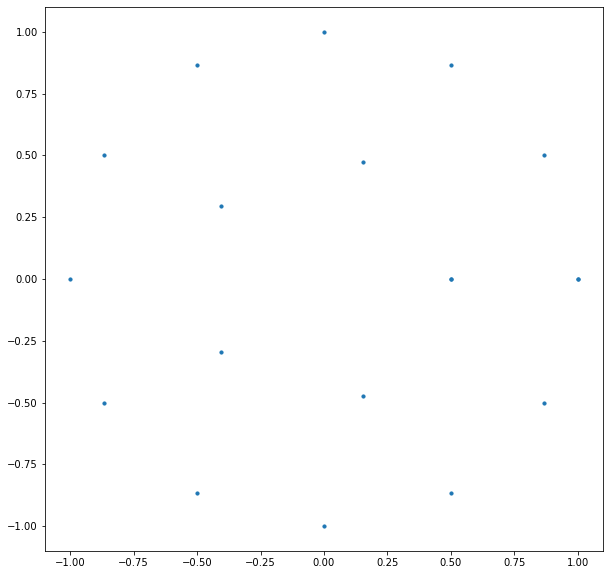

In [4]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot()
ax.scatter(data[0],data[1],s=10)